# Segunda prueba
# Modelo MultinomialNB - TfidfVectorizer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_final_actualizacion_mayus2.csv')
df.head()

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target
0,ElDiario.es,https://www.eldiario.es/politica/pp-recupera-l...,2023-07-11,El PP se recupera ligeramente pero sigue sin o...,La estimación de escaños no se mueve en la enc...,El partido popular se recupera muy ligeramente...,politica,0
1,ElDiario.es,https://www.eldiario.es/politica/58-ciudadanos...,2023-07-11,Un 58% de los ciudadanos critican los pactos c...,"El 17,8% de quienes apuestan por Feijóo ven “m...",El PP ha necesitado a Vox para recuperar buena...,politica,0
2,ElDiario.es,https://www.eldiario.es/politica/diputado-ayus...,2023-07-11,Un diputado de Ayuso reúne a un grupo de vícti...,Daniel Portero trata con urgencia de contrarre...,El diputado del PP en la Asamblea de Madrid Da...,politica,0
3,ElDiario.es,https://www.eldiario.es/andalucia/almeria/psoe...,2023-07-11,El PSOE de Mójacar recurre ante el Constitucio...,"Ya con nuevo alcalde del PP, los socialistas r...",Mojácar retomó el ritmo político con la procla...,andalucia,0
4,ElDiario.es,https://www.eldiario.es/castilla-la-mancha/pol...,2023-07-11,La exalcaldesa de Toledo pide a Feijóo que fir...,"La socialista, también número dos al Congreso,...",La exalcaldesa de Toledo y 'número dos' de la ...,castilla-la-mancha,0


In [3]:
df.Target.value_counts()

0    2506
1    2473
Name: Target, dtype: int64

In [4]:
df["Texto"] = df.Titular.str.lower() + " " + df.Cuerpo.str.lower()
df.head()

,Periódico,Hipervínculo,Fecha publicación,Titular,Subtítulo,Cuerpo,Categoría,Target,Texto
0,ElDiario.es,https://www.eldiario.es/politica/pp-recupera-l...,2023-07-11,El PP se recupera ligeramente pero sigue sin o...,La estimación de escaños no se mueve en la enc...,El partido popular se recupera muy ligeramente...,politica,0,el pp se recupera ligeramente pero sigue sin o...
1,ElDiario.es,https://www.eldiario.es/politica/58-ciudadanos...,2023-07-11,Un 58% de los ciudadanos critican los pactos c...,"El 17,8% de quienes apuestan por Feijóo ven “m...",El PP ha necesitado a Vox para recuperar buena...,politica,0,un 58% de los ciudadanos critican los pactos c...
2,ElDiario.es,https://www.eldiario.es/politica/diputado-ayus...,2023-07-11,Un diputado de Ayuso reúne a un grupo de vícti...,Daniel Portero trata con urgencia de contrarre...,El diputado del PP en la Asamblea de Madrid Da...,politica,0,un diputado de ayuso reúne a un grupo de vícti...
3,ElDiario.es,https://www.eldiario.es/andalucia/almeria/psoe...,2023-07-11,El PSOE de Mójacar recurre ante el Constitucio...,"Ya con nuevo alcalde del PP, los socialistas r...",Mojácar retomó el ritmo político con la procla...,andalucia,0,el psoe de mójacar recurre ante el constitucio...
4,ElDiario.es,https://www.eldiario.es/castilla-la-mancha/pol...,2023-07-11,La exalcaldesa de Toledo pide a Feijóo que fir...,"La socialista, también número dos al Congreso,...",La exalcaldesa de Toledo y 'número dos' de la ...,castilla-la-mancha,0,la exalcaldesa de toledo pide a feijóo que fir...


In [5]:
df["Texto"][65]

'méxico registra un récord de 74.764 solicitudes de refugio en el primer semestre de 2023 ciudad de méxico, 11 jul (efe).- el número de solicitantes de refugio en méxico durante el primer semestre de 2023 registró una cifra récord de 74.764 migrantes, un aumento del 28 % respecto al mismo periodo del año pasado, cuando se recibieron 58.283, reveló la comisión mexicana de ayuda a refugiados (comar).la cifra de peticiones recibidas por el organismo gubernamental encargado de realizar este tipo de trámites migratorios en junio también es superior a la de los años anteriores, igual que sucedió en los cinco meses pasados: 11.570, frente a las 9.667 del año pasado y las 10.297 de 2021.en el caso de seguir con esta tendencia méxico podría registrar cifras inéditas de solicitudes de refugio en 2023, en un contexto marcado por las restricciones migratorias impuestas por estados unidos, destino de muchos de los extranjeros que atraviesan el país.este martes se cumplen dos meses desde la derogaci

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["Texto"], 
                                                  df["Target"], 
                                                  test_size=0.2, 
                                                  stratify=df["Target"],
                                                  random_state=42)

In [7]:
df["Titular"][65]

'México registra un récord de 74.764 solicitudes de refugio en el primer semestre de 2023'

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
spanish_stop_words = ['10','000','00','el', 'la', 'los', 'las', 'de', 'del', 'en', 'un', 'una', 'unos', 'unas','esto', 'esta', 'este', 'estos', 'estas','newsletter']
vectorizer = TfidfVectorizer(max_features=8000, stop_words=stopwords+spanish_stop_words)
X_train_vect = vectorizer.fit_transform(X_train)

In [9]:
vectorizer.get_feature_names_out()

array(['100', '107', '11', ..., 'único', 'únicos', 'útil'], dtype=object)

In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=20).fit(X_train_vect, y_train)
clf.predict(X_train_vect)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
X_test_vect = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_vect)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Modelo MultinomialNB:", accuracy)


Accuracy Modelo MultinomialNB: 0.8845381526104418


In [13]:
#matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Confusion Matrix


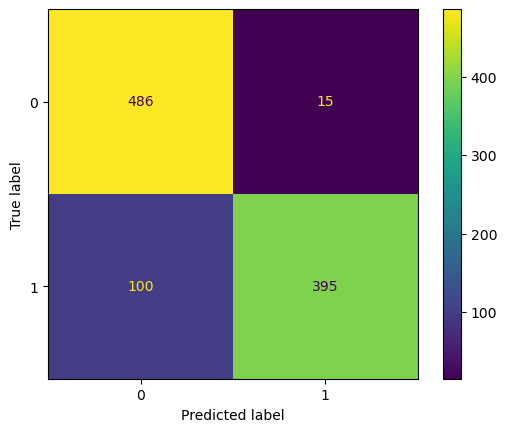

In [14]:
cfm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()